In [1]:
%reload_ext autoreload
%autoreload 2

import sys
from tqdm import tqdm
import h5py
import numpy as np

sys.path.append("..")
import axionmirror.units_constants as uc

from config import pc_dict

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colormaps as cms
mpl.rc_file('../matplotlibrc')

## 1. Reach

### 1.1 Single telescope

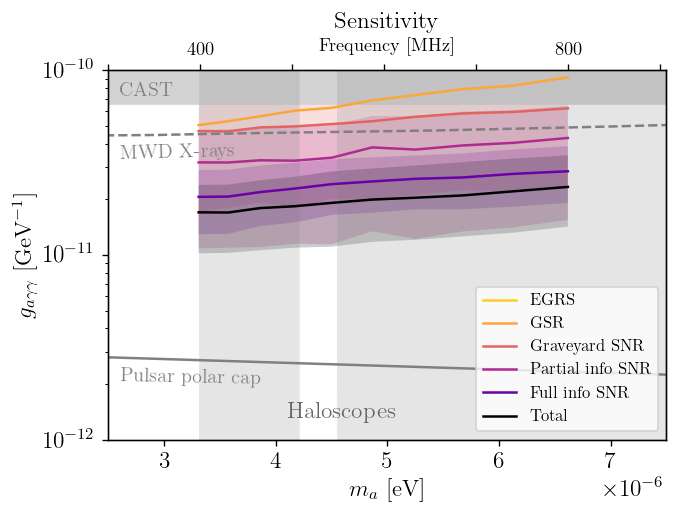

In [2]:
config_name = 'CHIME'
pc = pc_dict[config_name]

plot_names = ['egrs', 'gsr', 'snrg-base', 'snrp-base', 'snrf-base', 'total-base']
plot_all_samples = False

label_dict = {
    'egrs' : 'EGRS',
    'gsr' : 'GSR',
    'snrg-base' : 'Graveyard SNR',
    'snrp-base' : 'Partial info SNR',
    'snrf-base' : 'Full info SNR',
    'total-base' : 'Total',
}
color_dict = {
    'egrs' : cms['plasma'](0.9),
    'gsr' : cms['plasma'](0.8),
    'snrg-base' : cms['plasma'](0.6),
    'snrp-base' : cms['plasma'](0.4),
    'snrf-base' : cms['plasma'](0.2),
    'total-base' : 'k',
}

fig, ax = plt.subplots()

for pn in plot_names:
    with h5py.File(f"../outputs/plot_data/{pc.name}/{pn}.h5", 'r') as hf:
        # nu_arr = np.delete(hf['nu'][:], 18, axis=0)
        # gagg_arr = np.delete(hf['gagg'][:], 18, axis=1)
        nu_arr = hf['nu'][:]
        gagg_arr = hf['gagg'][:]
        
        ma_arr = 4 * np.pi * uc.hbar * nu_arr / uc.eV
        
        if gagg_arr.shape[0] == 1:
            ax.plot(ma_arr, gagg_arr[0], color=color_dict[pn], label=label_dict[pn])
        else:
            if plot_all_samples:
                for i, gagg_sample in enumerate(gagg_arr):
                    ax.plot(ma_arr, gagg_sample, color=color_dict[pn], alpha=0.1,
                            label=(label_dict[pn] if i==0 else None), zorder=-1)
            else:
                ax.plot(ma_arr, np.median(gagg_arr, axis=0), color=color_dict[pn], label=label_dict[pn])
                ax.fill_between(ma_arr, np.quantile(gagg_arr, 0.95, axis=0), np.quantile(gagg_arr, 0.05, axis=0),
                                alpha=0.2, facecolor=color_dict[pn], edgecolor='none')

ax.fill_between([1e-6, 1e-5], uc.gagg_CAST/uc.invGeV, 1e-8, color='lightgray')
ax.text(2.6e-6, 7.3e-11, 'CAST', color='gray')
limit_ma_arr, limit_gagg_arr = np.loadtxt("../data/limits/PulsarPolarCap.txt", unpack=True)
ax.plot(limit_ma_arr, limit_gagg_arr, color='gray', ls='-')
ax.text(2.6e-6, 2e-12, 'Pulsar polar cap', color='gray', rotation=-1.2)
limit_ma_arr, limit_gagg_arr = np.loadtxt("../data/limits/MWDXrays.txt", unpack=True)
ax.plot(limit_ma_arr, limit_gagg_arr, color='gray', ls='--')
ax.text(2.6e-6, 3.3e-11, 'MWD X-rays', color='gray', rotation=1.5)
limit_ma_arr, limit_gagg_arr = np.loadtxt("../data/limits/ADMX2021.txt", unpack=True)
ax.fill_between(limit_ma_arr, limit_gagg_arr, np.full_like(limit_gagg_arr, 1), color='gray', alpha=0.2, ec=None)
limit_ma_arr, limit_gagg_arr = np.loadtxt("../data/limits/RBF_UF_Haloscopes.txt", unpack=True)
ax.fill_between(limit_ma_arr, limit_gagg_arr, np.full_like(limit_gagg_arr, 1), color='gray', alpha=0.2, ec=None)
ax.text(4.1e-6, 1.3e-12, 'Haloscopes', color=cms['binary'](0.6), fontsize=14)

ax.set(xlim=(2.5e-6, 7.5e-6), ylim=(1e-12, 1e-10), yscale='log')
ax.set(xlabel='$m_a$ [eV]', ylabel=r'$g_{a\gamma\gamma}$ [GeV$^{-1}$]', title='Sensitivity')

ax_top = ax.twiny()
ax_top.set_xlim(np.array(ax.get_xlim()) * uc.eV / (4*np.pi*uc.hbar))
ax_top.set_xlabel('Frequency [MHz]', fontsize=11)
ax_top.set_xticks([300, 400, 500, 600, 700, 800, 900])
ax_top.set_xticklabels(['', '400', '', '', '', '800', ''], fontsize=11)
ax_top.xaxis.set_label_coords(0.5, 1.05)

ax.legend(loc='lower right', fontsize=10)
fig.savefig(f'../outputs/reach_plots/{config_name}.pdf')

In [4]:
with h5py.File(f"../outputs/plot_data/{pc.name}/egrs.h5", 'r') as hf:
    # nu_arr = np.delete(hf['nu'][:], 18, axis=0)
    # gagg_arr = np.delete(hf['gagg'][:], 18, axis=1)
    nu_arr = hf['nu'][:]
    gagg_arr = hf['gagg'][:]

In [37]:
pc = pc_dict['BURSTT2048']

### 1.2 Different telescopes

In [2]:
from config import pc_dict

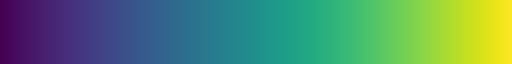

In [8]:
cms['viridis']

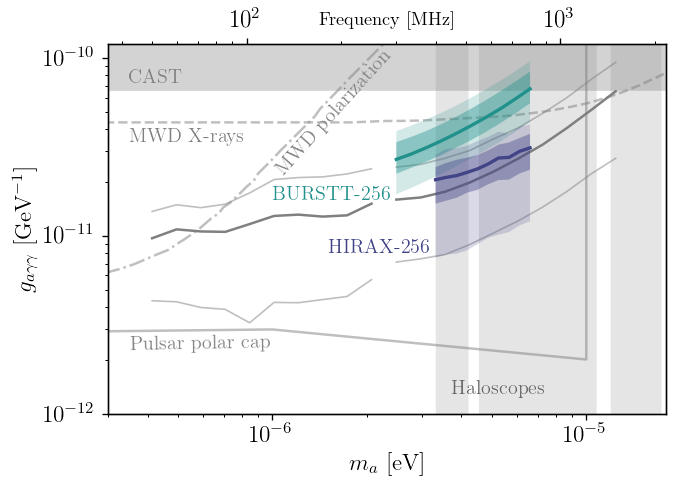

In [27]:
save_name = 'HB'
pc_names = ['HIRAX256', 'BURSTT256']
median_only_names = ['HERA', 'CHORD']
plot_all_samples = False
inline_legend = True
crude_estimate_pc_names = ['CHIME', 'HERA', 'CHORD', 'HIRAX256', 'HIRAX1024', 'BURSTT256', 'BURSTT2048']
crude_estimate_pc_names = []

label_dict = {
    'CHIME' : 'CHIME',
    'HERA' : 'HERA',
    'CHORD' : 'CHORD',
    'HIRAX256' : 'HIRAX-256',
    'HIRAX1024' : 'HIRAX-1024',
    'BURSTT256' : 'BURSTT-256',
    'BURSTT2048' : 'BURSTT-2048',
}
color_dict = {
    'CHIME' : cms['plasma'](0.1),
    'HERA' : cms['plasma'](0.4),
    'CHORD' : cms['plasma'](0.7),
    
    'HIRAX256' : cms['viridis'](0.2),
    'BURSTT256' : cms['viridis'](0.5),

    'HIRAX1024' : cms['plasma'](0.0),
    'BURSTT2048' : 'k',
}
alphas_dict = {
}
zorder_dict = {
    'CHIME' : 10,
    'HERA' : 9,
    'CHORD' : 8,
    'HIRAX256' : 7,
    'HIRAX1024' : 6,
    'BURSTT256' : 5,
    'BURSTT2048' : 4,
}

fig, ax = plt.subplots()

for pc_name in pc_names + median_only_names:

    pc = pc_dict[pc_name]

    with h5py.File(f"../outputs/plot_data/{pc.name}/total-base.h5", 'r') as hf:
        nu_arr = np.array(hf['nu'][:])
        gagg_arr = np.array(hf['gagg'][:])
        
        ma_arr = 4 * np.pi * uc.hbar * nu_arr / uc.eV
        color = color_dict[pc_name]
        label = label_dict[pc_name]
        
        if gagg_arr.shape[0] == 1:
            ax.plot(ma_arr, gagg_arr[0], color=color, label=label_dict[pc_name])
        else:
            if plot_all_samples:
                for i, gagg_sample in enumerate(gagg_arr):
                    ax.plot(ma_arr, gagg_sample, color=color, alpha=0.1,
                            label=(label if i==0 else None), zorder=-1)
            else:
                alphas = alphas_dict[pc_name] if pc_name in alphas_dict else [0.4, 0.2]
                if pc_name in median_only_names:
                    ax.plot(ma_arr, np.median(gagg_arr, axis=0), color='gray', ls='-', label=label, zorder=-1)
                    ax.plot(ma_arr, np.quantile(gagg_arr, 0.975, axis=0), alpha=0.5, color='gray', lw=1, zorder=-1)
                    ax.plot(ma_arr, np.quantile(gagg_arr, 0.025, axis=0), alpha=0.5, color='gray', lw=1, zorder=-1)
                else:
                    ax.plot(ma_arr, np.median(gagg_arr, axis=0), color=color, label=label, zorder=zorder_dict[pc_name], lw=2)
                    ax.fill_between(ma_arr, np.quantile(gagg_arr, 0.84, axis=0), np.quantile(gagg_arr, 0.16, axis=0),
                                    alpha=alphas[0], facecolor=color, edgecolor='none', zorder=zorder_dict[pc_name])
                    ax.fill_between(ma_arr, np.quantile(gagg_arr, 0.975, axis=0), np.quantile(gagg_arr, 0.025, axis=0),
                                    alpha=alphas[1], facecolor=color, edgecolor='none', zorder=zorder_dict[pc_name])
                
for pc_name in crude_estimate_pc_names:
    pc = pc_dict[pc_name]
    nu_est_s = pc.nu_s
    gagg_est_s = pc.telescope.sens_estimate(nu_est_s)
    ma_est_s = 4 * np.pi * uc.hbar * nu_est_s / uc.eV
    color = color_dict[pc_name]
    ax.plot(ma_est_s, gagg_est_s, color=color, ls=':')

ax.fill_between([1e-8, 1e-4], uc.gagg_CAST/uc.invGeV, 1e-8, color='lightgray', zorder=-10)
ax.text(3.5e-7, 7.3e-11, 'CAST', color='gray')
limit_ma_arr, limit_gagg_arr = np.loadtxt("../data/limits/PulsarPolarCap.txt", unpack=True)
ax.plot(limit_ma_arr, limit_gagg_arr, color='gray', ls='-', alpha=0.5)
ax.text(3.5e-7, 2.3e-12, 'Pulsar polar cap', color='gray', rotation=1)
limit_ma_arr, limit_gagg_arr = np.loadtxt("../data/limits/MWDPolarisation.txt", unpack=True)
ax.plot(limit_ma_arr, limit_gagg_arr, color='gray', ls='-.', alpha=0.5)
ax.text(1.0e-6, 2.2e-11, 'MWD polarization', color='gray', rotation=48)
limit_ma_arr, limit_gagg_arr = np.loadtxt("../data/limits/MWDXrays.txt", unpack=True)
ax.plot(limit_ma_arr, limit_gagg_arr, color='gray', ls='--', alpha=0.5)
ax.text(3.5e-7, 3.4e-11, 'MWD X-rays', color='gray')
limit_ma_arr, limit_gagg_arr = np.loadtxt("../data/limits/ADMX2021.txt", unpack=True)
ax.fill_between(limit_ma_arr, limit_gagg_arr, np.full_like(limit_gagg_arr, 1), color='gray', alpha=0.2, ec=None)
limit_ma_arr, limit_gagg_arr = np.loadtxt("../data/limits/RBF_UF_Haloscopes.txt", unpack=True)
ax.fill_between(limit_ma_arr, limit_gagg_arr, np.full_like(limit_gagg_arr, 1), color='gray', alpha=0.2, ec=None)
ax.text(3.7e-6, 1.3e-12, 'Haloscopes', color=cms['binary'](0.6))

ax.set(yscale='log', xscale='log')
ax.set(xlim=(3e-7, 1.8e-5), ylim=(1e-12, 1.2e-10))
ax.set(xlabel='$m_a$ [eV]', ylabel=r'$g_{a\gamma\gamma}$ [GeV$^{-1}$]')

ax_top = ax.twiny()
ax_top.set(xscale=ax.get_xscale())
ax_top.set_xlim(np.array(ax.get_xlim()) * uc.eV / (4 * np.pi * uc.hbar))
ax_top.set_xlabel('Frequency [MHz]', fontsize=11)
ax_top.xaxis.set_label_coords(0.5, 1.05)

if inline_legend:
    if 'HERA' in pc_names:
        ax.text(1.1e-6, 5.5e-12, 'HERA', color=color_dict['HERA'])
    if 'CHORD' in pc_names:
        ax.text(8e-6, 1.2e-11, 'CHORD', color=color_dict['CHORD'], rotation=0)
    if 'CHIME' in pc_names:
        ax.text(4e-6, 7e-12, 'CHIME', color=color_dict['CHIME'])
    if 'HIRAX256' in pc_names:
        ax.text(1.5e-6, 8e-12, 'HIRAX-256', color=color_dict['HIRAX256'])
    if 'BURSTT256' in pc_names:
        ax.text(1e-6, 1.6e-11, 'BURSTT-256', color=color_dict['BURSTT256'])
else:
    ax.legend(loc='upper right', fontsize=10)

if save_name is not None:
    fig.savefig(f'../outputs/reach_plots/{save_name}.pdf')

In [5]:
with h5py.File(f"../outputs/plot_data/{pc_dict['HIRAX256'].name}/total-base.h5", 'r') as hf:
    nu_arr = np.array(hf['nu'][:])
    gagg_arr = np.array(hf['gagg'][:])

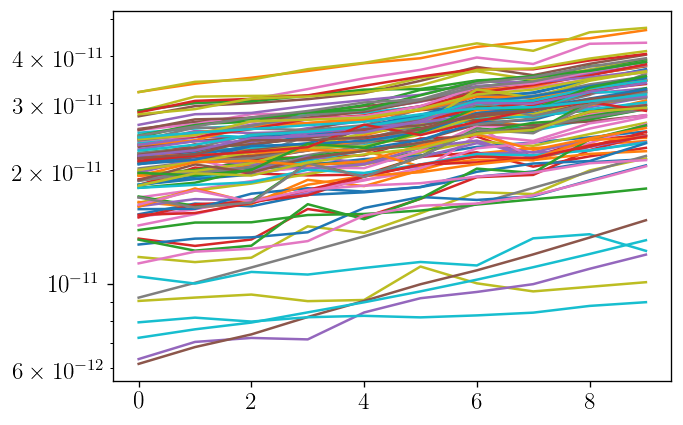

In [7]:
plt.plot(gagg_arr.T)
plt.yscale('log');

### 1.3 Estimates

In [62]:
nu_ref = 400. # [MHz]
t_ref = pc_dict['CHIME'].telescope
sens_ref = t_ref.sens_estimate([nu_ref])[0]
merit_ref = t_ref.merit(nu_ref)

print(f'At {nu_ref:.0f} MHz')
print('name     Aeff[m^2]  FOV[deg^2] n_pixel tobs/day[min] sqrt(npol*Aeff*FOV) sens(rel.)')
pc_names = ['CHIME', 'HERA', 'CHORD', 'HIRAX256', 'HIRAX1024', 'BURSTT256', 'BURSTT2048']

for pc_name in pc_names:
    pc = pc_dict[pc_name]
    t = pc.telescope
    
    print(f'{t.name:12}', end='')
    A = t.Aeff_zenith(nu_ref)/10000 # [m^2]
    print(f'{A:6.0f}', end='')
    FOV = t.instantaneous_fov(nu_ref)*(180/np.pi)**2 # [deg^2]
    print(f'{FOV:12.0f}', end='')
    pixel_size = (uc.c0 / nu_ref) ** 2 / t.Aeff_zenith(nu_ref) # [rad^2]
    n_pixel = t.survey_area(nu_ref) / pixel_size
    print(f'{n_pixel:8.0f}', end='')
    print(f'{t.t_obs(nu_ref, t.dec)/t.t_obs_days/60:14.1f}', end='')
    print(f'{t.merit(nu_ref) / merit_ref:15.3f}', end='')
    print(f'{(t.sens_estimate([nu_ref])[0] / sens_ref) ** (-2):11.3f}')

At 400 MHz
name     Aeff[m^2]  FOV[deg^2] n_pixel tobs/day[min] sqrt(npol*Aeff*FOV) sens(rel.)
CHIME         3120         515   41379          26.3          1.000      1.000
HERA         29548          16   19637          18.4          0.537      0.323
CHORD         7173         102   52317          10.5          0.676      0.815
HIRAX256      3629         102   34902           7.9          0.481      0.446
HIRAX1024    14515         102  139607           7.9          0.962      0.892
BURSTT256      131        3600    1343         262.1          0.383      0.462
BURSTT2048    1037        3600   10624         262.1          1.078      1.299


In [63]:
nu_ref = 400. # [MHz]
t_ref = pc_dict['CHIME'].telescope
sens_ref = t_ref.sens_estimate([nu_ref])[0]
merit_ref = t_ref.merit(nu_ref)

print(f'At {nu_ref:.0f} MHz')
print('name     Aeff[m^2]  FOV[deg^2] sqrt(npol*Aeff*FOV) sens(rel.)')
pc_names = ['CHIME', 'HERA', 'CHORD', 'HIRAX256', 'HIRAX1024', 'BURSTT256', 'BURSTT2048']

for pc_name in pc_names:
    pc = pc_dict[pc_name]
    t = pc.telescope
    
    print(f'{t.name:12}', end='')
    A = t.Aeff_zenith(nu_ref)/10000 # [m^2]
    print(f'{A:6.0f}', end='')
    FOV = t.instantaneous_fov(nu_ref)*(180/np.pi)**2 # [deg^2]
    print(f'{FOV:12.0f}', end='')
    # pixel_size = (uc.c0 / nu_ref) ** 2 / t.Aeff_zenith(nu_ref) # [rad^2]
    # n_pixel = t.survey_area(nu_ref) / pixel_size
    # print(f'{n_pixel:8.0f}', end='')
    # print(f'{t.t_obs(nu_ref, t.dec)/t.t_obs_days/60:14.1f}', end='')
    print(f'{t.merit(nu_ref) / merit_ref:15.3f}', end='')
    print(f'{(t.sens_estimate([nu_ref])[0] / sens_ref) ** (-2):11.3f}')

At 400 MHz
name     Aeff[m^2]  FOV[deg^2] sqrt(npol*Aeff*FOV) sens(rel.)
CHIME         3120         515          1.000      1.000
HERA         29548          16          0.537      0.323
CHORD         7173         102          0.676      0.815
HIRAX256      3629         102          0.481      0.446
HIRAX1024    14515         102          0.962      0.892
BURSTT256      131        3600          0.383      0.462
BURSTT2048    1037        3600          1.078      1.299


## 2. Graveyard samples

In [38]:
from config import wdir

In [39]:
zs = np.load(f'{wdir}/CHIME-nnu10-nra1-ndec1/snr-graveyard/snr-graveyard-inu6-ira0-idec0.npy')

  0%|          | 0/30 [00:00<?, ?it/s]

100%|██████████| 30/30 [00:04<00:00,  7.43it/s]


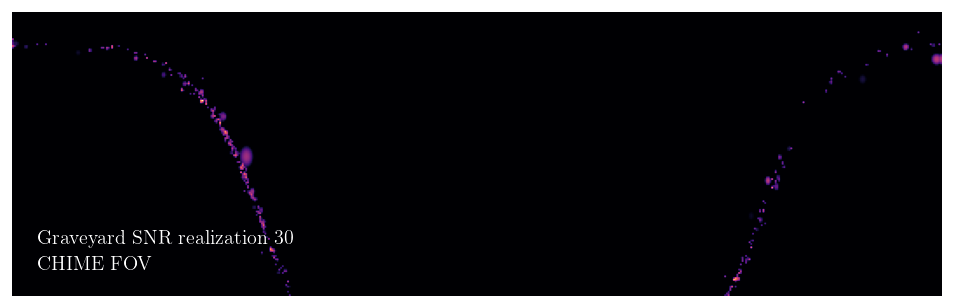

In [52]:
n_show = 30

for i in tqdm(range(n_show)):
    fig, ax = plt.subplots(figsize=(10,5))
    ax.imshow(np.flipud(np.log10(np.clip(zs[i], 1e-9, None))),
              extent=(180, -180, -20, 90), vmin=-9, vmax=-4, cmap='magma')
    ax.axis('off')
    ax.text(170, -0, f'Graveyard SNR realization {i+1}', color='white', fontsize=12)
    ax.text(170, -10, 'CHIME FOV', color='white', fontsize=12)
    fig.savefig(f"../outputs/plot_graveyard_samples/{i}.png", pad_inches=0.)
    if i != n_show-1:
        plt.close()

In [53]:
from PIL import Image

def create_gif_from_pngs(png_dir, n_png, output_path):
    images = []
    for i in range(n_png):
        image = Image.open(f'{png_dir}/{i}.png')
        images.append(image)
    images[0].save(output_path, save_all=True, append_images=images[1:], optimize=False, duration=200, loop=0)

create_gif_from_pngs('../outputs/plot_graveyard_samples', n_show, '../outputs/graveyard_samples.gif')

## 3. Check pixelization

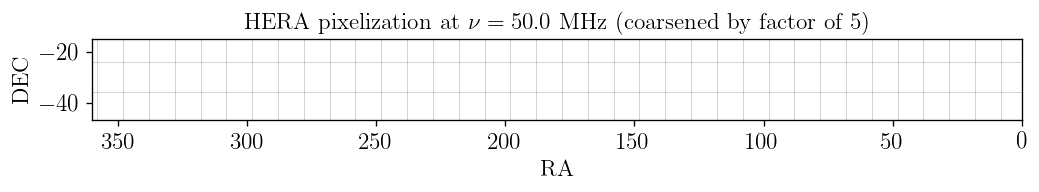

In [76]:
pc = pc_dict['HERA']
pc.build(0, 0, 0)

fig, ax = plt.subplots(figsize=(10, 5))
for dec in pc.dec_edges[::5]:
    ax.axhline(np.rad2deg(dec), color='k', alpha=0.2, linewidth=0.5)
for ra in pc.ra_edges[::5]:
    ax.axvline(np.rad2deg(ra), color='k', alpha=0.2, linewidth=0.5)
ax.set(xlim=(360, 0), ylim=(np.rad2deg(pc.telescope.survey_dec_min(pc.nu)), np.rad2deg(pc.telescope.survey_dec_max(pc.nu))), aspect=1)
ax.set(xlabel='RA', ylabel='DEC', title=pc.telescope.name + rf' pixelization at $\nu={pc.nu:.1f}$~MHz (coarsened by factor of 5)')
fig.savefig(f'../outputs/{pc.telescope.name}_pixels.pdf', bbox_inches='tight')

## A3. Check new pixelization

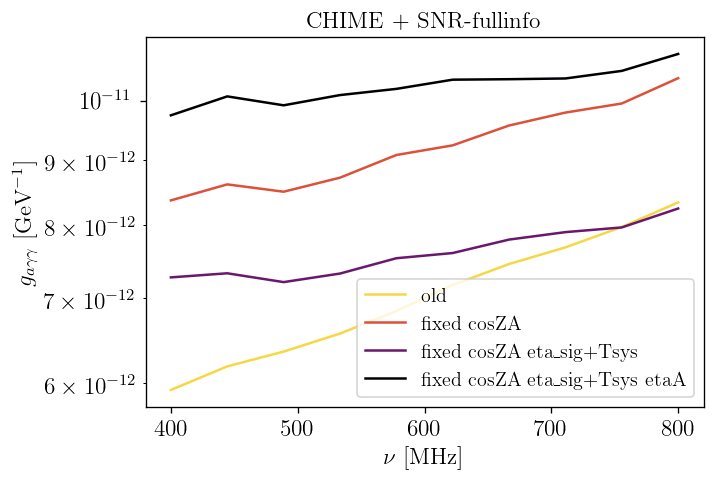

In [3]:
fig, ax = plt.subplots()

with h5py.File(f"../outputs/plot_data/CHIME-10-4-4/snrf0.h5", 'r') as hf:
    nu0 = hf['nu'][:]
    gagg0 = hf['gagg'][:][0]
    ax.plot(nu0, gagg0, color=cms['inferno'](0.9), label='old')
with h5py.File(f"../outputs/plot_data/CHIME-10-4-4/snrf1.h5", 'r') as hf:
    nu0 = hf['nu'][:]
    gagg0 = hf['gagg'][:][0]
    ax.plot(nu0, gagg0, color=cms['inferno'](0.6), label='fixed cosZA')
with h5py.File(f"../outputs/plot_data/CHIME-10-4-4/snrf2.h5", 'r') as hf:
    nu0 = hf['nu'][:]
    gagg0 = hf['gagg'][:][0]
    ax.plot(nu0, gagg0, color=cms['inferno'](0.3), label='fixed cosZA eta_sig+Tsys')
with h5py.File(f"../outputs/plot_data/CHIME-10-4-4/snrf3.h5", 'r') as hf:
    nu0 = hf['nu'][:]
    gagg0 = hf['gagg'][:][0]
    ax.plot(nu0, gagg0, color=cms['inferno'](0.0), label='fixed cosZA eta_sig+Tsys etaA')
ax.set(yscale='log')
ax.set(xlabel=r'$\nu$ [MHz]', ylabel=r'$g_{a\gamma\gamma}$ [GeV$^{-1}$]',
       title='CHIME + SNR-fullinfo')
ax.legend();

## A2. Extragalactic radio sources

In [8]:
gagg1

array([6.18759602e-11, 5.39990655e-11, 7.49198254e-11, 7.08917018e-11,
       6.47874184e-11, 5.82142573e-11, 7.94846051e-11, 7.48339958e-11,
       6.98201607e-11, 6.19006962e-11, 8.43371752e-11, 7.91967499e-11,
       7.41122218e-11, 6.59924765e-11, 8.96632719e-11, 8.49073752e-11,
       7.87497170e-11, 7.02039923e-11, 9.59028045e-11, 9.01232557e-11,
       8.35985970e-11, 7.45362189e-11, 1.00743185e-10, 9.54320606e-11,
       8.85885936e-11, 7.97624384e-11, 1.06496398e-10, 1.00705740e-10,
       9.36327045e-11, 8.42833120e-11])

[None]

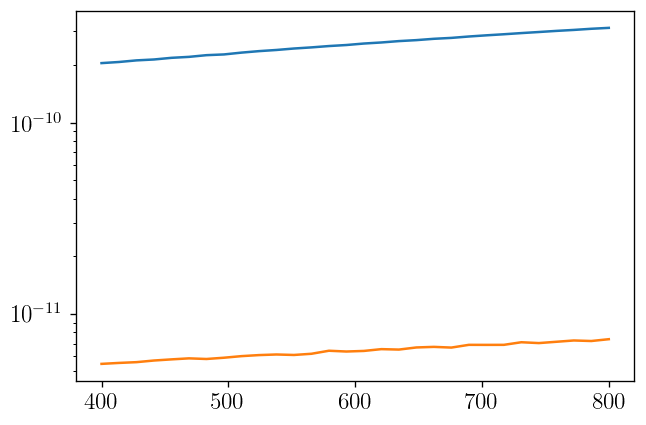

In [14]:
fig, ax = plt.subplots()

with h5py.File(f"../outputs/plot_data/CHIME-nnu30-nra3-ndec3/egrs.h5", 'r') as hf:
    nu0 = hf['nu'][:]
    gagg0 = hf['gagg'][:][0]
    ax.plot(nu0, gagg0, color='C0')
with h5py.File(f"../outputs/plot_data/CHIME-nnu30-nra3-ndec3/total.h5", 'r') as hf:
    nu1 = hf['nu'][:]
    gagg1 = hf['gagg'][:][0]
    ax.plot(nu1, gagg1, color='C1')
ax.set(yscale='log')

## A1. Check gsr old v new

In [15]:
config_name = 'CHIME-nnu30-nra3-ndec3'
config = config_dict[config_name]

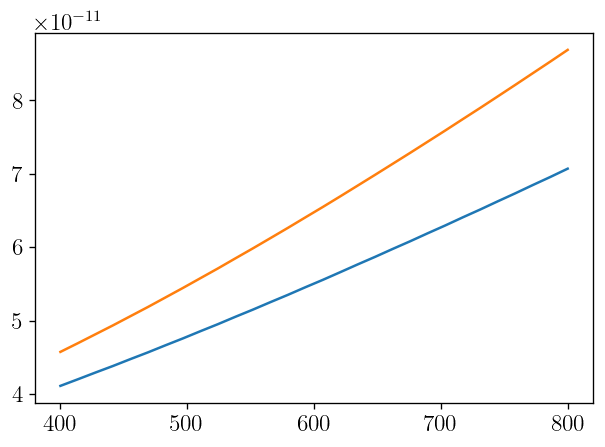

In [16]:
fig, ax = plt.subplots()

with h5py.File(f"../outputs/plot_data/{config_name}/gsr.h5", 'r') as hf:
    nu0 = hf['nu'][:]
    gagg0 = hf['gagg'][:][0]
    ax.plot(nu0, gagg0, color='C0')
with h5py.File(f"../outputs/plot_data/{config_name}/gsr.old.h5", 'r') as hf:
    nu1 = hf['nu'][:]
    gagg1 = hf['gagg'][:][0]
    ax.plot(nu1, gagg1, color='C1')

In [17]:
gagg0/gagg1

array([0.89883146, 0.89527977, 0.8917363 , 0.88795032, 0.88450648,
       0.88081036, 0.87744507, 0.87381254, 0.87057528, 0.86711107,
       0.86393137, 0.86059297, 0.85763686, 0.85438066, 0.85149524,
       0.84841363, 0.84570208, 0.84301248, 0.84004066, 0.83751029,
       0.83471127, 0.83230365, 0.82962335, 0.82729255, 0.82477908,
       0.8225971 , 0.82012357, 0.81805029, 0.81573346, 0.81376627])

In [6]:
with h5py.File(f"../outputs/gsr/Ta_408MHz_fieldJF.h5") as hf:
    Ta = hf['Ta'][:]

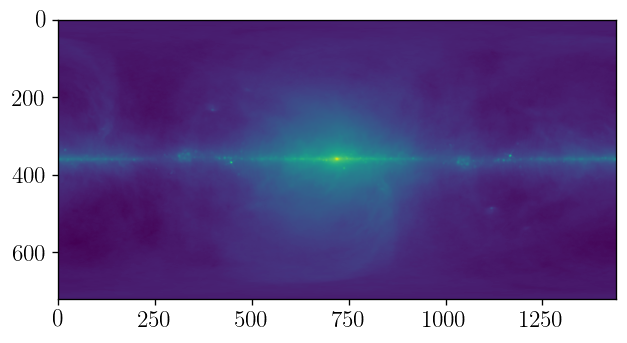

In [7]:
plt.imshow(np.log(Ta))

In [8]:
np.mean(Ta)

5.32123e-07

In [18]:
prefix = '/n/holyscratch01/iaifi_lab/yitians/all_sky_gegenschein/axions-against-the-world/outputs/intermediates/CHIME-nnu30-nra3-ndec3'
z0 = np.load(f'{prefix}/gsr_JF/gsr-inu0-ira1-idec2.npy')
z1 = np.load(f'{prefix}/gsr_JF_old/gsr-inu0-ira1-idec2.npy')

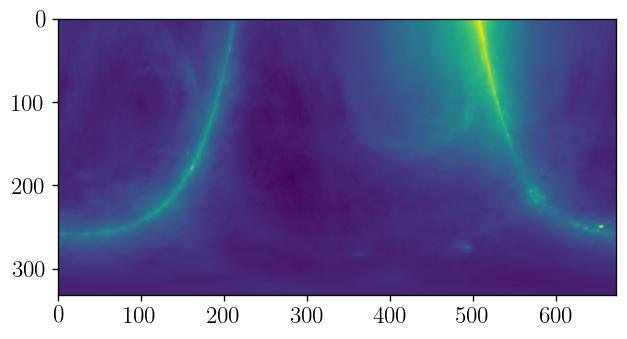

In [22]:
plt.imshow(np.log(z0))

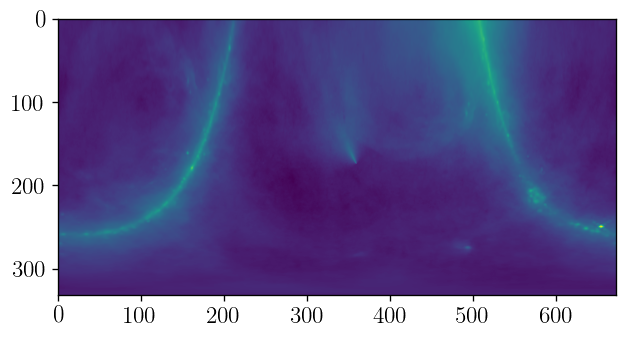

In [23]:
plt.imshow(np.log(z1))

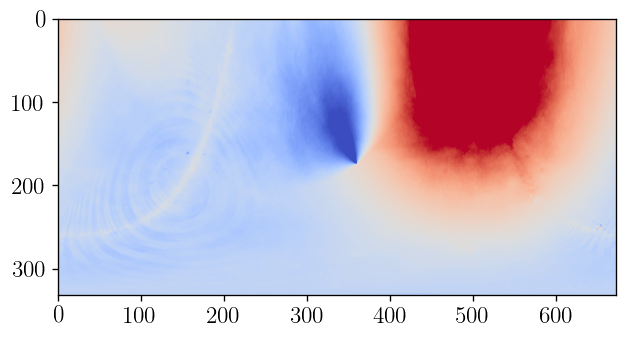

In [21]:
plt.imshow(z0/z1, vmin=0.5, vmax=1.5, cmap='coolwarm')

In [24]:
np.mean(z0)

5.2147897e-07

In [25]:
np.mean(z1)

4.299195e-07

In [26]:
np.mean(z0/z1)

1.052278

## TMP